In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
from scipy.optimize import curve_fit
from pandas.tools.plotting import table
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 9] # bigger figures
plt.rcParams['font.size'] = 20
pd.set_option('display.max_rows',100)

In [4]:
# Separtors: whitspace, not just tab
# Don't use first column as index
# more info: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html
dat = pd.read_table(open('dipooide.txt'), delim_whitespace=True, index_col=False)

In [5]:
dat

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.734,1.777,1.85,1.953,2.092,2.269,2.46,2.688,2.946,3.238,...,6.84,7.11,7.37,7.60,7.78,7.94,8.06,8.16,8.21,8.24
1,1.680,1.720,1.79,1.900,2.040,2.200,2.39,2.630,2.890,3.170,...,6.89,7.17,7.42,7.66,7.84,8.01,8.12,8.21,8.26,8.29
2,1.600,1.630,1.71,1.810,1.940,2.100,2.30,2.530,2.790,3.100,...,6.95,7.25,7.50,7.74,7.94,8.09,8.22,8.30,8.35,8.38
3,1.480,1.510,1.57,1.680,1.800,1.940,2.15,2.370,2.640,2.960,...,7.05,7.37,7.65,7.88,8.06,8.22,8.33,8.43,8.49,8.51
4,1.310,1.360,1.41,1.510,1.620,1.770,1.95,2.190,2.460,2.770,...,7.25,7.56,7.82,8.05,8.26,8.39,8.50,8.59,8.65,8.66
5,1.140,1.160,1.22,1.290,1.400,1.540,1.73,1.940,2.220,2.530,...,7.47,7.77,8.07,8.30,8.47,8.61,8.71,8.80,8.84,8.86
6,0.930,0.960,1.00,1.070,1.160,1.280,1.44,1.650,1.890,2.210,...,7.75,8.10,8.37,8.58,8.73,8.85,8.95,9.03,9.07,9.08
7,0.690,0.720,0.74,0.800,0.870,0.970,1.12,1.260,1.480,1.800,...,8.14,8.48,8.73,8.90,9.06,9.13,9.21,9.28,9.30,9.33
8,0.450,0.450,0.47,0.500,0.560,0.630,0.71,0.830,0.990,1.230,...,8.76,9.01,9.16,9.30,9.39,9.46,9.49,9.53,9.56,9.58
9,0.200,0.170,0.18,0.200,0.210,0.240,0.26,0.330,0.370,0.450,...,9.51,9.65,9.69,9.74,9.79,9.80,NaN,NaN,NaN,NaN


In [16]:
dat.ma = dat.m / dat.n
dat

,n,m,ma
0,24,0.44,0.018333
1,24,0.46,0.019167
2,24,0.44,0.018333
3,24,0.42,0.017500
4,24,0.42,0.017500
5,24,0.45,0.018750
6,24,0.43,0.017917
7,24,0.45,0.018750
8,24,0.46,0.019167
9,24,0.47,0.019583


In [62]:
dat.describe()

,n,m,ma
count,52.000000,52.000000,52.000000
mean,24.192308,0.448462,0.018537
std,0.595357,0.022263,0.000787
min,24.000000,0.400000,0.016667
25%,24.000000,0.430000,0.017917
50%,24.000000,0.450000,0.018750
75%,24.000000,0.460000,0.019167
max,26.000000,0.500000,0.020417


(array([  1.,   1.,   8.,   5.,  10.,  13.,   6.,   6.,   1.,   1.]),
 array([ 0.01666667,  0.01704167,  0.01741667,  0.01779167,  0.01816667,
         0.01854167,  0.01891667,  0.01929167,  0.01966667,  0.02004167,
         0.02041667]),
 <a list of 10 Patch objects>)

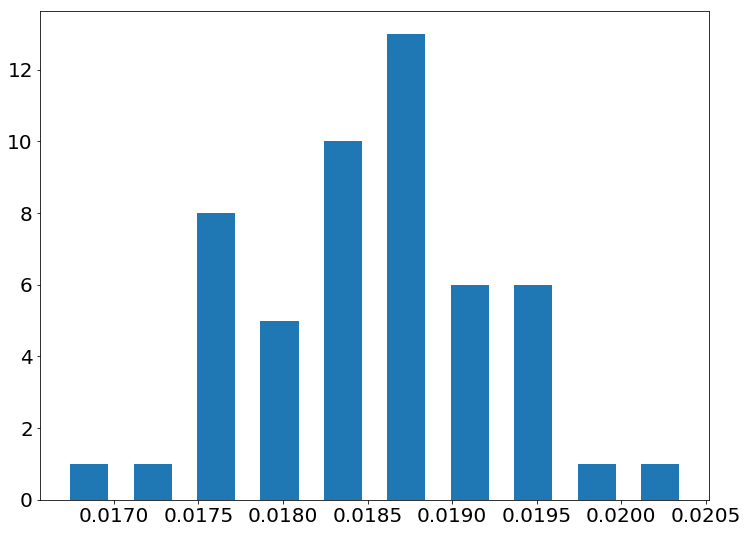

In [63]:
plt.hist(dat.ma, bins=10, align="mid", rwidth=0.6)


In [10]:
def madel(H, h):
    return  np.sqrt(9.78*(H + h))

In [45]:
def model (H, h):
    return np.sqrt(9.78) * (2*H + h)/(2*H**(1/2) )

In [34]:
def midel(g, j):
     return   np.sqrt(g)*(j)

In [43]:
fit_res = curve_fit(midel, det.j, det.v, sigma = dat.sv, method='lm')
print(fit_res)
fg = fit_res[0] 
sg=(np.diag(fit_res[1]))
print(fg)

(array([ 0.39690329]), array([[ 0.00043651]]))
[ 0.39690329]


In [8]:
xj = np.linspace(-0.2, 0.8, 1000)
plt.plot(()
plt.xlabel('(2H + h)/(2h^(1/2))[m^(1/2)]')
plt.ylabel('c[m/s]')
plt.title('Gráfica con análisis para el agua sin jabón')
plt.legend()
plt.savefig('vjt1.pdf')

SyntaxError: invalid syntax (<ipython-input-8-3b8a75bce7be>, line 2)

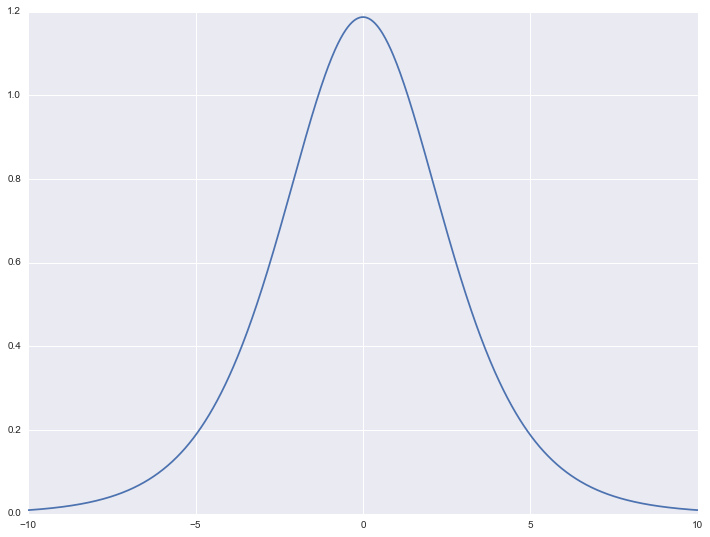

In [66]:
xs = np.linspace(-10, 10, 1000)
plt.plot(xs, 3 * 0.629**2 * 1 /np.square(np.cosh(0.629 / 2 * xs)))
plt.savefig('sech.png')

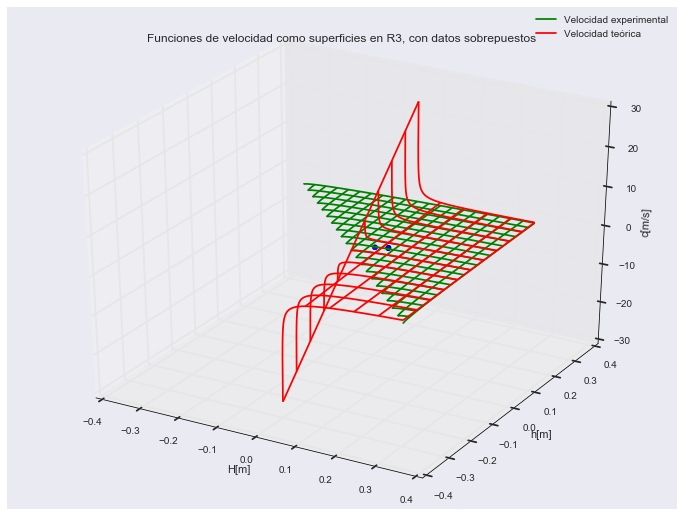

In [51]:
fig = plt.figure()
xx = np.linspace(-0.3, .3, 1000)
xy = np.linspace(-.3, .3, 1000)
xi, xj = np.meshgrid(xx, xy, sparse=False, indexing='ij')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dat.H, dat.h, dat.v, s = 25, c = "b")
ax.plot_wireframe(xi, xj, madel(xi,xj), rstride=50, cstride=50, color="g", label = "Velocidad experimental")
ax.plot_wireframe(xi, xj, model(xi,xj), rstride=100, cstride=100, color = "r", label = "Velocidad teórica")
plt.xlabel('H[m]')
plt.ylabel('h[m]')
ax.set_zlabel('c[m/s]')
plt.title("Funciones de velocidad como superficies en R3, con datos sobrepuestos")
plt.legend()
#plt.savefig('v3d.png')

In [51]:
print(dat.to_latex(column_format='|'.join(['', "l"] + len(dat.columns) * ['r'] + [""])))

\begin{tabular}{|l|r|r|r|r|r|r|r|r|r|r|}
\toprule
{} &        H &      h &      l &      t &      v &     sH &     sh &     sl &     st &      sv \\
\midrule
0 &  0.04555 &  0.029 &  0.665 &  0.763 &  0.872 &  0.005 &  0.004 &  0.005 &  0.034 &  0.0394 \\
1 &  0.04555 &  0.027 &  0.663 &  0.759 &  0.874 &  0.005 &  0.004 &  0.005 &  0.034 &  0.0397 \\
2 &  0.04555 &  0.027 &  0.663 &  0.762 &  0.870 &  0.005 &  0.004 &  0.005 &  0.034 &  0.0394 \\
3 &  0.04555 &  0.026 &  0.666 &  0.729 &  0.914 &  0.005 &  0.004 &  0.005 &  0.034 &  0.0432 \\
4 &  0.04555 &  0.026 &  0.664 &  0.728 &  0.912 &  0.005 &  0.004 &  0.005 &  0.034 &  0.0431 \\
5 &  0.07500 &  0.035 &  0.668 &  0.661 &  1.011 &  0.005 &  0.004 &  0.005 &  0.034 &  0.0525 \\
6 &  0.07500 &  0.034 &  0.662 &  0.596 &  1.111 &  0.005 &  0.004 &  0.005 &  0.034 &  0.0639 \\
7 &  0.07500 &  0.035 &  0.665 &  0.662 &  1.005 &  0.005 &  0.004 &  0.005 &  0.034 &  0.0521 \\
8 &  0.07500 &  0.036 &  0.668 &  0.594 &  1.125 &  0.005 

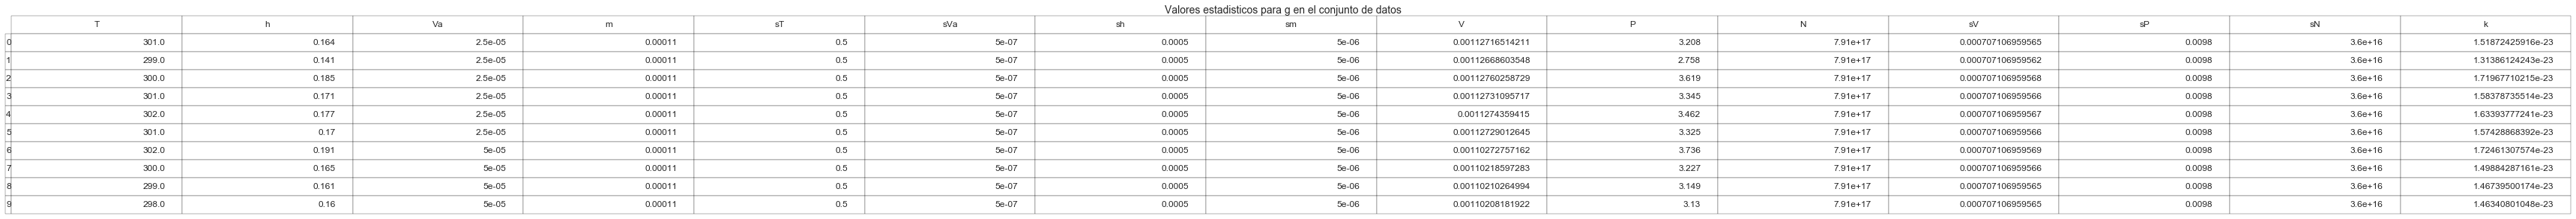

In [332]:
0.000013fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, dat, loc='upper center', colWidths=[0.17]*len(dat.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(2, 2) # change size table
plt.suptitle("Valores estadisticos para g en el conjunto de datos", fontsize=14)
plt.savefig('gw.png', transparent=True)
